# 1. Introduction to least square method

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

## Dataset is: [Price, Demand]

In [33]:
#Dataset = (x1, y1 ), (x2, y2 ), ..., (x5, y5)
input = np.array([[49, 124],
                  [69, 95],
                  [89, 71],
                  [99, 45],
                  [109,18]])

## Setup the matrices

In [39]:
# n = number of observations
n = np.shape(input)[0]

# X = (1, x1), (1, x2), ..., (1, x5)
X = np.matrix([np.ones(m), input[:,0]]).T

# Y = y1, y2, ..., y5
Y = np.matrix(input[:,1]).T

## Solve for projection matrix

In [50]:
# A = (X^T * X)^-1 * X^T * Y
A = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# b is the constant or intercept
b = A[0,0]

# m is the coefficient
m = A[1,0]

In [94]:
xx = np.linspace(0.0, 125, num=6, retstep=False)

yy = np.array(A[0] + A[1] * xx)

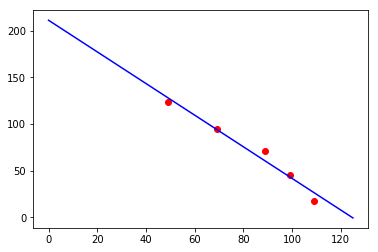

In [95]:
# Plot data, regression line
plt.figure(1)
plt.plot(xx, yy.T, color='b')
plt.scatter(input[:,0], input[:,1], color='r')
plt.show()


# 2. Introduction to Simple Linear Regression

In [96]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [ ]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [ ]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [ ]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [ ]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# 3. Introduction to Multiple Linear Regression

In [101]:
from pandas.core import datetools
import statsmodels.api as sm

In [102]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

## Example data from sklearn

In [104]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## These are the independent variables

In [105]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

## These are the dependent variables

In [112]:
data.target

## Define the data to fit a model

In [109]:
import numpy as np
import pandas as pd

# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

## Use statsmodels and run a regression without constant

In [119]:
import statsmodels.api as sm

X = df["RM"] ## X usually means our input variables (or independent variables)
y = target["MEDV"] ## Y usually means our output/dependent variable

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

## Interpretation

**Coefficient (coef):** Means that as the RM variable increases by 1, the predicted value of MDEV increases by 3.634

**R-squared:** Is the percentage of *variance* our model explains (also called coefficient of determination).
- Best possible score is 1.0 and it can be negative (because the model can be worse than random!). 
- A constant model that always predicts the expected value of y, disregarding the input features, would get a R-squared score of 0.0.

**The standard error:** standard deviation of the sampling distribution of a statistic, most commonly of the mean.

**The t scores and p-values:** Useful for hypothesis testing. It means that RM has statistically significant p-value; we predict at a 95% percent confidence that the value of RM is between 3.548 to 3.759.

In [120]:
# Print out the statistics of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Wed, 05 Jul 2017   Prob (F-statistic):          3.74e-256
Time:                        08:38:58   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Use statsmodels and run a regression with constant

In [129]:
import statsmodels.api as sm # import statsmodels 

X = df["RM"] 
y = target["MEDV"] 
X = sm.add_constant(X) ## Add an intercept or constant to the model

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 05 Jul 2017   Prob (F-statistic):           2.49e-74
Time:                        08:55:41   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Performing a Multiple Linear Regression

In [146]:
X = df[['RM','LSTAT']]
y = target['MEDV'] 
X = sm.add_constant(X) ## Add an intercept or constant to the model

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

## Observations
- This model has a much higher R-squared value *0.948*, meaning that this model explains 94.8% of the variance in our dependent variable. (Most of the time, when we add variables to a regression model, R² will be higher..)
- RM and LSTAT are statistically significant in predicting (or estimating) the median house value 
- As RM increases by 1, MEDV will increase by 5.0948 and when LSTAT increases by 1, MEDV will decrease by -0.6424. 
- LSTAT: is the percentage of lower status of the populatio
- RM: more rooms in a house (usually the higher, the value of the house will become higher).

In [147]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Wed, 05 Jul 2017   Prob (F-statistic):          7.01e-112
Time:                        09:06:56   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Performing Linear Regression with SKLearn

In [149]:
from sklearn import datasets
data = datasets.load_boston()

In [150]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [163]:
X = df[['RM','LSTAT']]
y = target['MEDV']

In [164]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [165]:
predictions = lm.predict(X)
print(predictions[0:5])

[ 28.94101368  25.48420566  32.65907477  32.40652     31.63040699]


In [166]:
# This is thre R-squared of the model
lm.score(X,y)

0.63856160626034031

In [167]:
# This is the intercept (constant)
lm.intercept_

-1.358272811874528

In [168]:
# These are the coefficients
lm.coef_

array([ 5.09478798, -0.64235833])